In [6]:
from bs4 import BeautifulSoup
import urllib
import urllib.parse
from time import sleep
import pandas as pd
from selenium import webdriver
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [193]:
import os
# use selenium to create object driver.
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument("--test-type")
options.binary_location = "/usr/bin/chromium"
driver = webdriver.Chrome("C:/Users/schen24/Anaconda3/Library/chromedriver.exe")

In [194]:
# Set the URL we want to visit.
url = "https://en.wikipedia.org/wiki/List_of_Pennsylvania_counties_by_per_capita_income"
print(url)

https://en.wikipedia.org/wiki/List_of_Pennsylvania_counties_by_per_capita_income


In [195]:
driver.get(url)

In [196]:
# Wait one second.
sleep(1)

In [197]:
# Beautiful Soup it!
soup = BeautifulSoup(driver.page_source, 'lxml')

**write loop to extract all county household median incomes**

In [198]:
# grey out after first run if extracting data in batches
hhdict = {}

In [199]:

#reinitialize soup object to new page
soup = BeautifulSoup(driver.page_source, 'lxml')
    
# extracting info
entry ={}
stuff = soup.find('table', {"class":"wikitable sortable jquery-tablesorter"})
stuff = stuff.find('tbody')
stuff = stuff.findAll('tr')
for tr in stuff:
    a = tr.findAll('td')[1].text.replace('\n', '') 
    b = tr.findAll('td')[3].text.replace('\n', '').replace('$', '').replace(',', '')
    hhdict.update({a:b})

In [200]:
driver.close()

In [201]:
for k, v in hhdict.items():
    hhdict[k] = float(v)

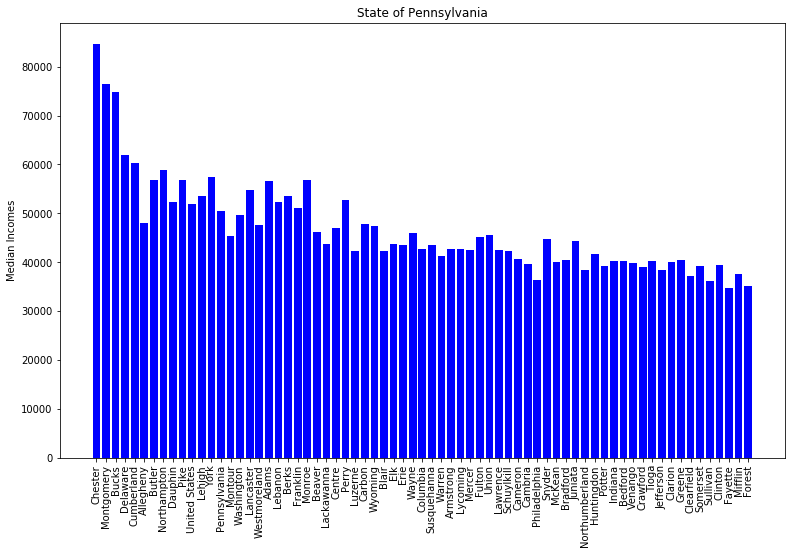

In [19]:
plt.figure(figsize=(13,8))
plt.bar(list(hhdict.keys()), hhdict.values(), color='b')
plt.xticks(rotation=90)
plt.ylabel('Median Incomes')
plt.title('State of Pennsylvania')
plt.show()

In [202]:
%store hhdict

Stored 'hhdict' (dict)
